# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,-1].values

In [4]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(150, 4)


In [5]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]
 [-0.80392556 -0.82150798  0.04735245  0.21876435]
 [-0.21352735  1.73601687 -1.19037495 -1.20374277]
 [ 0.14071157 -0.82150798  0.72247648  0.47740201]
 [ 0.02263193 -0.12400121  0.21613346  0.34808318]
 [-0.09544771 -1.05401024  0.10361279 -0.03987331]
 [ 1.0853487  -0.12400121  0.94751783  1.12399616]
 [-1.39432376  0.34100331 -1.41541629 -1.3330616 ]
 [ 1.20342834  0.10850105  0.72247648  1.38263382]
 [-1.04008484  1.03851009 -1.24663528 -0.81578628]
 [-0.56776627  1.50351461 -1.30289562 -1.3330616 ]
 [-1.04008484 -2.4490238  -0.1776889  -0.29851096]
 [ 0.73110978 -0.12400121  0.94751783  0.73603967]
 [ 0.96726906  0.57350557  1.0600385   1.64127148]
 [ 0.14071157 -1.98401928  0.66621615  0.34808318]
 [ 0.96726906 -1.2865125   1.11

One Hot Encoding for class

In [9]:
print(y_train)

[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]


In [10]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [11]:
print(train_labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1.

In [12]:
n_features = X.shape[1]
n_classes = train_labels.shape[1]
print(n_features,n_classes)

4 3


## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=512, activation='relu',input_shape=(n_features,)))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [16]:
from keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
ann.compile(optimizer = opt, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [17]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 4,099
Trainable params: 4,099
Non-trainable params: 0
_________________________________________________________________
None


### Training the ANN on the Training set

In [18]:
history_callback = ann.fit(X_train, train_labels, batch_size = 32, validation_split=0.2, epochs = 20)

Epoch 1/20
3/3 [==============================] - 4s 180ms/step - loss: 1.0385 - accuracy: 0.6146 - val_loss: 1.0363 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 55ms/step - loss: 0.9527 - accuracy: 0.7292 - val_loss: 0.9442 - val_accuracy: 0.5417
Epoch 3/20
3/3 [==============================] - 0s 25ms/step - loss: 0.8230 - accuracy: 0.7292 - val_loss: 0.8477 - val_accuracy: 0.5417
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6967 - accuracy: 0.7292 - val_loss: 0.7672 - val_accuracy: 0.5417
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 0.6011 - accuracy: 0.7500 - val_loss: 0.7067 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 20ms/step - loss: 0.5315 - accuracy: 0.7917 - val_loss: 0.6641 - val_accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.4826 - accuracy: 0.8125 - val_loss: 0.6301 - val_accuracy: 0.7083
Epoch 8/20
3/3 [==========

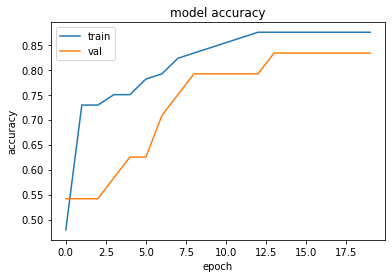

In [17]:
from matplotlib import pyplot as plt

plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

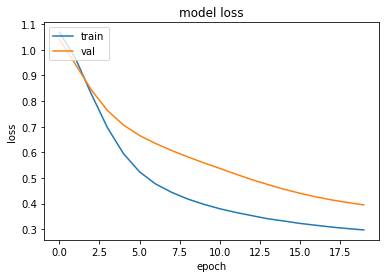

In [18]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [26]:
y_pred = ann.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [31]:
y_classes = y_pred.argmax(axis=-1)
print(y_pred)
print(y_classes)
print(y_test)
print(type(y_classes))
print(type(y_test))

[[0.01590567 0.19647148 0.78762287]
 [0.05040974 0.752927   0.1966632 ]
 [0.9948014  0.00331122 0.00188739]
 [0.0047446  0.06996365 0.9252918 ]
 [0.98184997 0.01328031 0.00486965]
 [0.00789201 0.06333423 0.9287737 ]
 [0.9853894  0.01047645 0.00413417]
 [0.05348459 0.24927534 0.69724005]
 [0.03674636 0.28775933 0.67549425]
 [0.10271409 0.5230273  0.37425858]
 [0.02962177 0.40124476 0.5691335 ]
 [0.08869353 0.29240167 0.6189049 ]
 [0.08262257 0.49046227 0.4269151 ]
 [0.04502966 0.331227   0.62374336]
 [0.07456277 0.4079299  0.5175074 ]
 [0.96920824 0.02449984 0.00629189]
 [0.0783907  0.41754675 0.50406253]
 [0.0922823  0.6783088  0.22940895]
 [0.9524917  0.03878905 0.00871918]
 [0.9892391  0.00701913 0.00374176]
 [0.03874936 0.35606435 0.6051863 ]
 [0.12181924 0.4693707  0.40881005]
 [0.97929996 0.0153819  0.0053182 ]
 [0.95746547 0.03655991 0.00597463]
 [0.03274488 0.28763616 0.679619  ]
 [0.9941029  0.00437973 0.0015174 ]
 [0.98489016 0.01007861 0.00503123]
 [0.09723272 0.44787142 0.45

### Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_classes)
print(cm)
accuracy_score(y_test, y_classes)

[[11  0  0]
 [ 0  6  7]
 [ 0  0  6]]


0.7666666666666667